In [1]:
import pandas as pd
from sklearn.cluster import KMeans

%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


En el archivo “crime_data.csv” se encuentran el número de crímenes por cada 100.000 habitantes en cada uno de los estados de Estados Unidos y el porcentaje de la población que es urbana. Los crímenes se han agrupado en: asalto, asesinato y violación

Segmentar este conjunto de datos utilizando k-means y obtener los centroides de cada clúster y el listado de los estados en cada uno de los clúster. Para esto se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos

### Solución
En primer lugar se han de importar los datos

In [2]:
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plot(range(1, max_k), inertia, 'bx-')
    xlabel('k')
    ylabel(u'Dispersión')
    title(figure_name)
    


In [3]:
crime = pd.read_csv('crime_data.csv', sep = ',')
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Por un lado, se han de separar el listado de estados y por otro se ha de seleccionar el conjunto de datos para ser utilizados en la segmentación

In [4]:
state = crime['State']
crime = crime.drop('State', axis = 1)

Ahora se cargar los métodos para la selección de la cantidad optima de clúster y seleccionar el número de clusters en base a los.

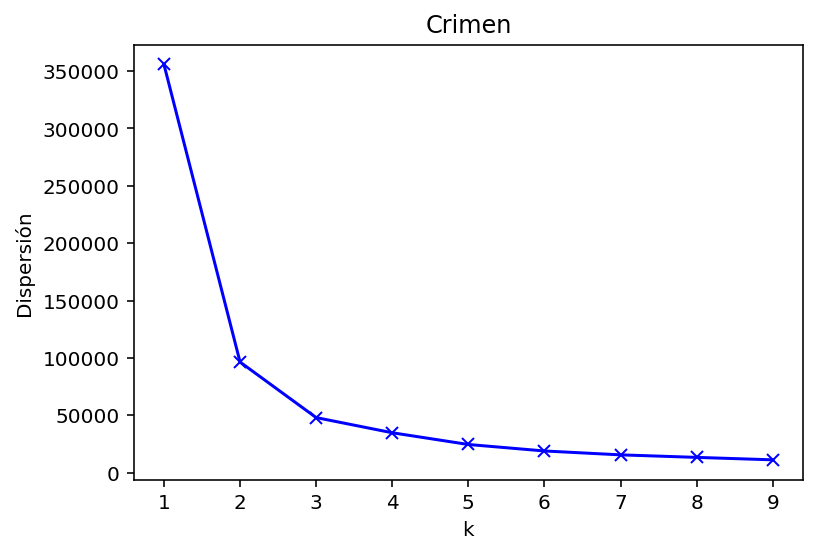

In [5]:
plot_dispersion(crime, 'Crimen')

Ahora se ha de selección el número de clústeres óptimos que en base a la curva de la distorsión parecen ser 3. Los centroides se puede obtener utilizando `KMeans`:

In [6]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(crime)

print('Los centroides son:')
print(kmeans.cluster_centers_)

Los centroides son:
[[ 11.8125     272.5625      68.3125      28.375     ]
 [  4.27        87.55        59.75        14.39      ]
 [  8.21428571 173.28571429  70.64285714  22.84285714]]


Finalmente, se puede obtener a que grupo pertenece cada estado

In [7]:
cluster = kmeans.predict(crime)

print('Primer grupo de estados')
print(state[cluster == 0])
print()
print('Segundo grupo de estados')
print(state[cluster == 1])
print()
print('Tercer grupo de estados')
print(state[cluster == 0])

Primer grupo de estados
0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
Name: State, dtype: object

Segundo grupo de estados
6       Connecticut
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
34             Ohio
37     Pennsylvania
40     South Dakota
43             Utah
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object

Tercer grupo de estados
0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12       